## 3.8

数据文件 `retail` 列出了1986年1月到2007年3月 U.K.（大不列颠联合王国）零售总额（单位：10亿英镑）。数据没有经过“季节调整”，基期2000年=100。  

In [1]:
library(TSA)

Warning message:
"package 'TSA' was built under R version 4.3.3"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




In [2]:
data(retail)

### (a) 
画出并解释这些数据的时间序列图。务必使用便于发现季节性的绘图标志。

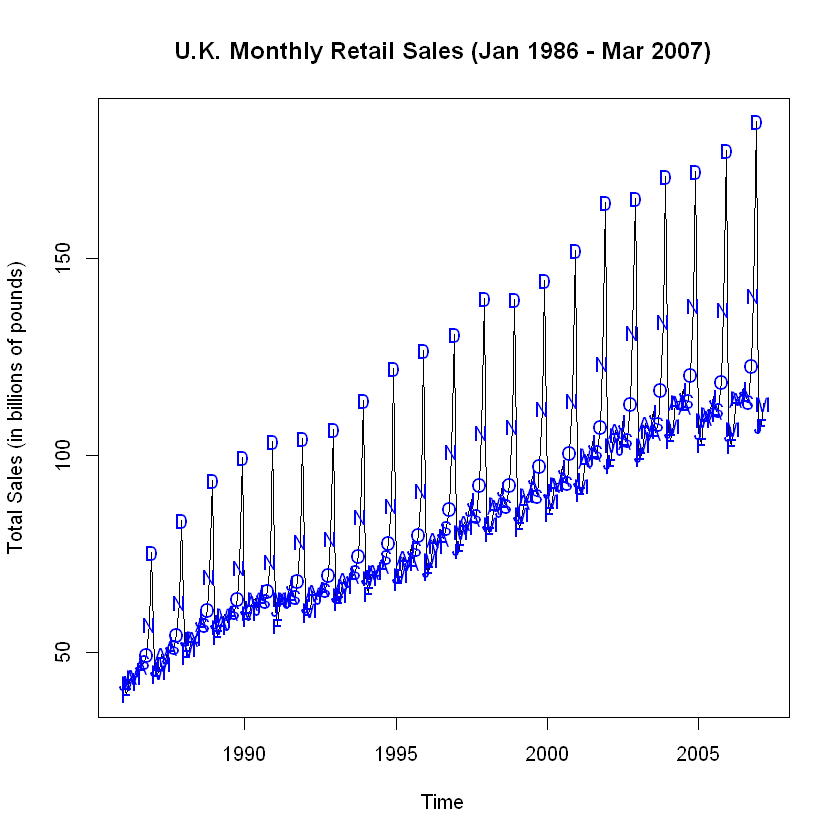

In [10]:
# 画出并解释retail的时间序列图

library(forecast)

# 画出时间序列图
ts.plot(retail, 
        main="U.K. Monthly Retail Sales (Jan 1986 - Mar 2007)", 
        xlab="Time", 
        ylab="Total Sales (in billions of pounds)", 
        col=c("black"), lty=1)

# 使用便于发现季节性的绘图标志
points(y = retail, x = time(retail), col = "blue", pch = as.vector(season(retail)))

从图中可以看出，零售总额的时间序列图呈现出明显的季节性波动，每个月份的销售额都呈现出一定的规律性。尤其是每一年的1月和2月，销售额会显著下降，而在10月和11月，销售额会显著上升，12月达到顶峰，而下一年的一月又将会断崖式下降。

此外，时间序列图还显示出一定的趋势，即销售额随着时间的推移而逐渐增加。

### (b) 
对该时间序列运用最小二乘法拟合季节均值+线性时间趋势。解释回归结果并保存该拟合的标准残差以便进一步分析。  

$\text{(Solution.)}$

In [4]:
# 最小二乘法拟合季节均值+线性时间趋势
retail.lm = lm(retail~ time(retail)+season(retail))
summary(retail.lm)


Call:
lm(formula = retail ~ time(retail) + season(retail))

Residuals:
     Min       1Q   Median       3Q      Max 
-19.8950  -2.4440  -0.3518   2.1971  16.2045 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -7.249e+03  8.724e+01 -83.099  < 2e-16 ***
time(retail)             3.670e+00  4.369e-02  83.995  < 2e-16 ***
season(retail)February  -3.015e+00  1.290e+00  -2.337  0.02024 *  
season(retail)March      7.469e-02  1.290e+00   0.058  0.95387    
season(retail)April      3.447e+00  1.305e+00   2.641  0.00880 ** 
season(retail)May        3.108e+00  1.305e+00   2.381  0.01803 *  
season(retail)June       3.074e+00  1.305e+00   2.355  0.01932 *  
season(retail)July       6.053e+00  1.305e+00   4.638 5.76e-06 ***
season(retail)August     3.138e+00  1.305e+00   2.404  0.01695 *  
season(retail)September  3.428e+00  1.305e+00   2.626  0.00919 ** 
season(retail)October    8.555e+00  1.305e+00   6.555 3.34e-10 ***
season(retail)Nov

从回归结果中，可以看到显著的季节性效应，因为季节项的系数都不为零。  

同时，时间趋势项的系数也显著，说明销售额随着时间的推移而逐渐增加（三月份是一个特例，但时间趋势依然显著）。  


In [5]:
# 保存残差
retail.res = residuals(retail.lm)


### (c) 
创建并解释（b）中的标准残差的时间序列图。务必使用恰当的绘图标志来核对季节性。  

$\text{(Solution).}$

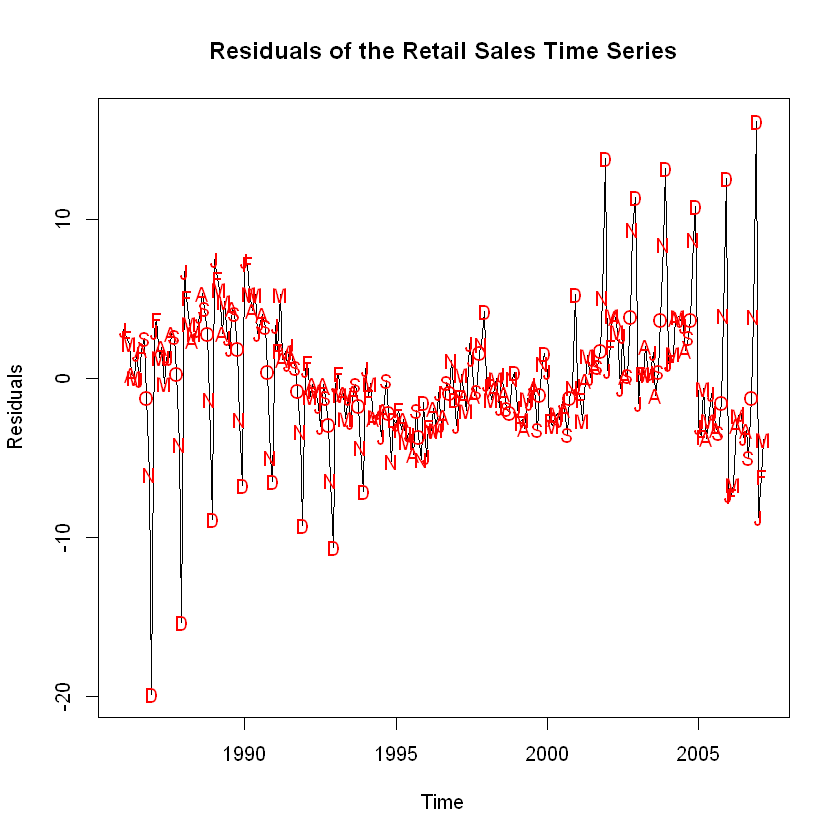

In [27]:
# 创建并解释（b）中的标准残差的时间序列图

   plot(as.vector(time(retail)), 
        retail.res, 
        type = 'l',
        main="Residuals of the Retail Sales Time Series",
        xlab="Time",
        ylab="Residuals",
        col=c("black"),
        lty=1)

# 使用便于发现季节性的绘图标志
points(y = retail.res, x = time(retail), col = "red", pch = as.vector(season(retail)))

从中可见，标准残差的时间序列图也显示出明显的季节性波动。  

每一年的十一月和十二月都会是一年中残差乐队之最大的月份，而一月份则以悬崖式变动成为一年中残差最小的月份。  

然而也可以发现一定的上升趋势，在八十年代中后期和九十年代前中期，残差多为负数，1995年12月的残差更是达到-20，九十年代末期和2000年之后，残差多为正数。

## 3.14

（继续习题 3.8）数据文件 `retail` 包含了 U.K. 月度零售数据。

### (a) 
获得用最小二乘拟合季节均值+线性时间趋势模型的残差。

$\text{(Solution.)}$

In [29]:
# 用最小二乘拟合季节均值+线性时间趋势模型的残差
retail.lm = lm(retail~ time(retail)+season(retail))

### (c)
计算并解释标准残差的样本自相关。  

$\text{(Solution.)}$

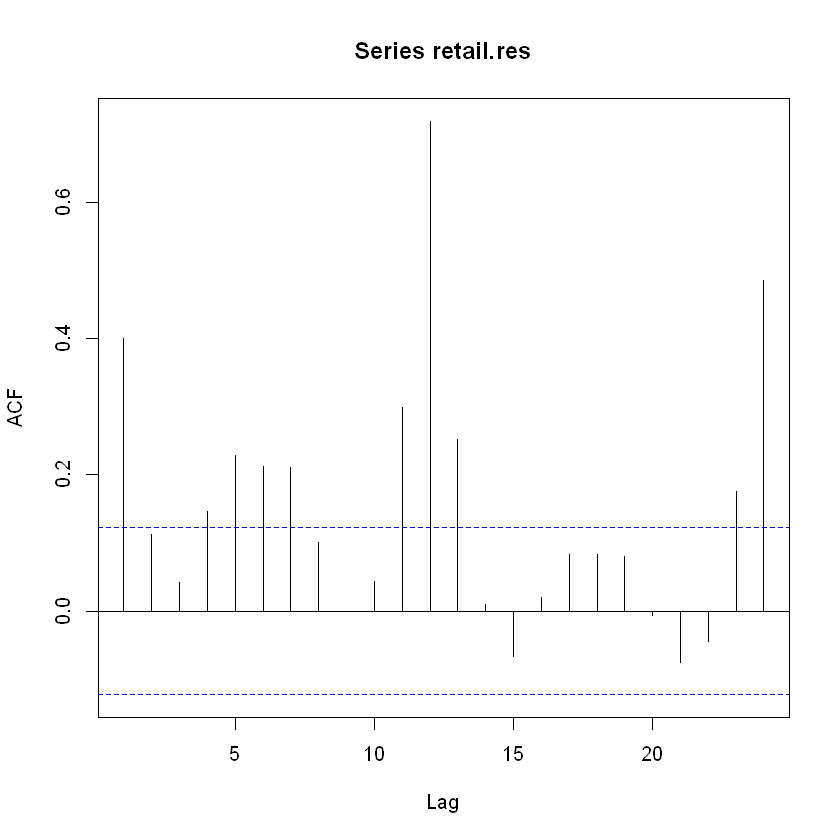

In [31]:
# 残差标准差的样本自相关
acf(retail.res)

基本上，残差是具备一定规律性的,在时间上存在一定的自相关性，尤其是滞后12期的自相关性最强。  

### (d)
研究标准残差（误差项）的正态性。考虑直方图和正态图。解释图形。  

$\text{(Solution.)}$

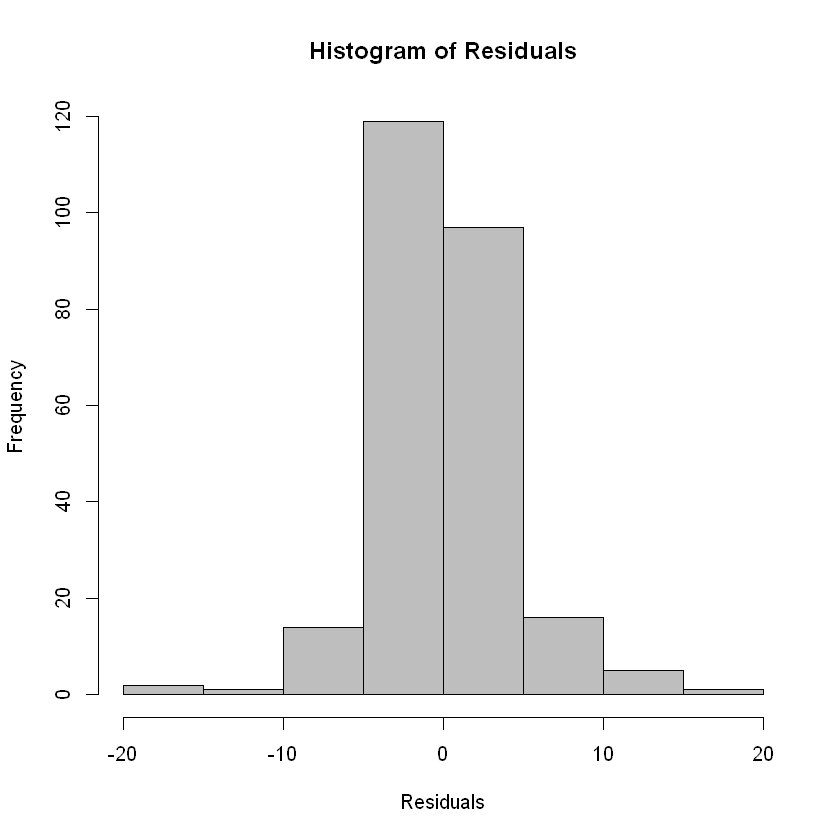

In [33]:
# 直方图

hist(retail.res,
     main="Histogram of Residuals",
     xlab="Residuals",
     ylab="Frequency",
     col=c("grey"),
     lty=1)

直方图显示，残差的分布大致呈正态分布，但存在一些偏斜，尤其是右侧的尾部较长。

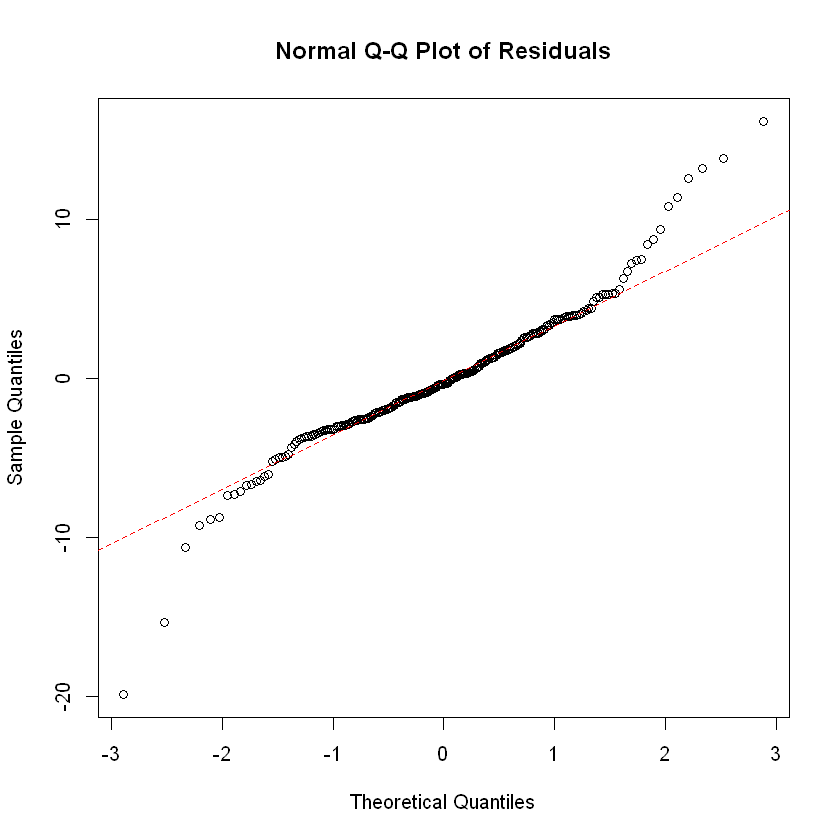

In [37]:
# 正态图
qqnorm(retail.res,
       main="Normal Q-Q Plot of Residuals",
       xlab="Theoretical Quantiles",
       ylab="Sample Quantiles",
       col=c("black"),
       lty=1)  

qqline(retail.res,
     col=c("red"),  
     lty=2)

QQ图显示，残差的分布相比于正态分布，存在一些偏斜，尤其是右侧的尾部较长。与直方图结果类似。  

所以我们能够认为残差不太满足正态性假设。

In [41]:
shapiro.test(retail.res)


	Shapiro-Wilk normality test

data:  retail.res
W = 0.94529, p-value = 3.624e-08


事实上，p value<0.05，我们能够拒绝残差满足正态性假设的null hypothesis。